# Classificador utilizando Redes Neurais Convolucionais
***

## Instalação dos pacotes
***

In [331]:
# pacote de inteligência artificial
import tensorflow as tf
# pacote de gerenciamento de conjuntos de dados
import pandas as pd
# pacote de procedimentos numéricos
import numpy as np
# pacote de visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sn
# pacote com funções para auxiliar o aprendizado de máquina
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Organizando o Dataframe
***

In [42]:
# conjunto de dados de treinamento, validação e teste
dataframe1 = pd.read_csv('../csv_data/braille_character1.csv', delimiter = ',', 
                         header = 0, usecols = ['Path', 'Labels'])
dataframe2 = pd.read_csv('../csv_data/braille_character2.csv', delimiter = ',',
                         header = 0, usecols = ['Path', 'Labels'])
dataframe3 = pd.read_csv('../csv_data/braille_character3.csv', delimiter = ',',
                         header = 0, usecols = ['Path', 'Labels'])

In [ ]:
# organizando a referência aos arquivos do primeiro dataframe
dataframe1_files = dataframe1['Path']
for i in range(0, len(dataframe1_files)):
    dataframe1_files[i] = '../files/images1/'+dataframe1_files[i]
dataframe1['Path'] = dataframe1_files

In [ ]:
# organizando a referência aos arquivos do segundo dataframe
dataframe2_files = dataframe2['Path']
for i in range(0, len(dataframe2_files)):
    dataframe2_files[i] = '../files/images2/'+dataframe2_files[i]
dataframe2['Path'] = dataframe2_files

In [ ]:
# organizando a referência aos arquivos do terceiro dataframe
dataframe3_files = dataframe3['Path']
for i in range(0, len(dataframe3_files)):
    dataframe3_files[i] = '../files/images3/'+dataframe3_files[i]
dataframe3['Path'] = dataframe3_files

In [51]:
# criando um dataframe com todas as imagens selecionadas
dataframe = pd.concat((dataframe1, dataframe2, dataframe3))

In [257]:
# aplicando um codifiação one-hot nos rótulos das imagens
df = pd.get_dummies(dataframe['Labels'])
df['Path'] = dataframe['Path']
df['Labels'] = dataframe['Labels']

## Separando as Imagens de Treinamento, Validação e Teste


In [259]:
# separando o dataframe de forma estratificada entre imagens de treinamento, validação e teste 
train_df, validation_df = train_test_split(df, train_size = 0.8, random_state = 42, 
                                           stratify = df['Labels'], shuffle = True)
validation_df, test_df = train_test_split(validation_df, test_size = 0.5, random_state = 42, 
                                          stratify = validation_df['Labels'], shuffle = True)

In [260]:
# visualizando a dimensão dos dados
print('Dimensão dos Dados de Treinamento: ', train_df.shape)
print('Dimensão dos Dados de Validação:', validation_df.shape)
print('Dimensão dos Dados de Teste:', test_df.shape)

Dimensão dos Dados de Treinamento:  (2952, 28)
Dimensão dos Dados de Validação: (369, 28)
Dimensão dos Dados de Teste: (369, 28)


In [261]:
# organizando a legenda do eixo x no gráfico de barra
xticks = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
xticks = np.array(xticks)

Text(0, 0.5, 'Quantidade de imagens')

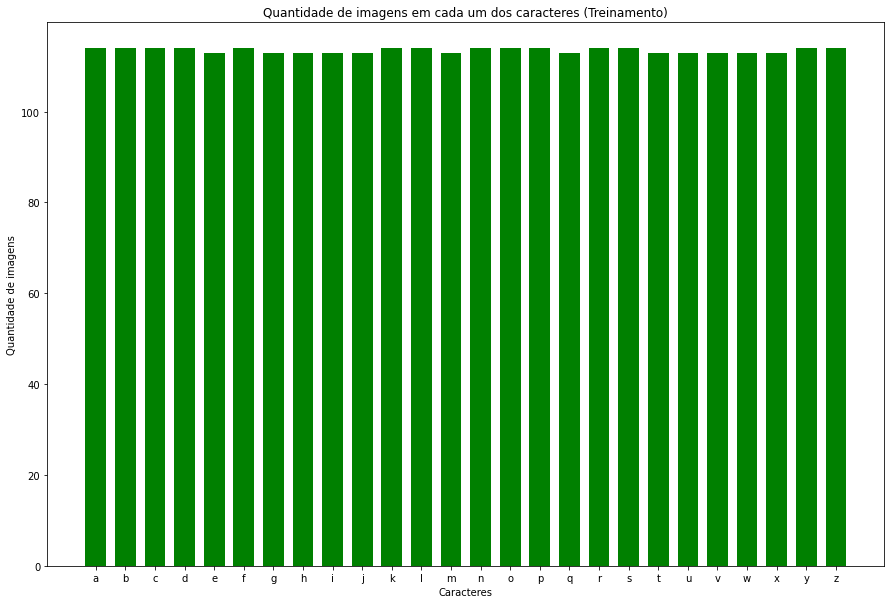

In [262]:
# gráfico de visualização da quantidade de imagens de treinamento
labels = train_df['Labels']
labels = np.array(labels)
count = np.zeros((26,1))
for i in range(0, len(labels)):
    count[labels[i]-1] += 1

plt.figure(figsize=(15, 10))
plt.bar(xticks, np.squeeze(count), color ='green', width = 0.7)
plt.title('Quantidade de imagens em cada um dos caracteres (Treinamento)')
plt.xlabel('Caracteres')
plt.ylabel('Quantidade de imagens')


Text(0, 0.5, 'Quantidade de imagens')

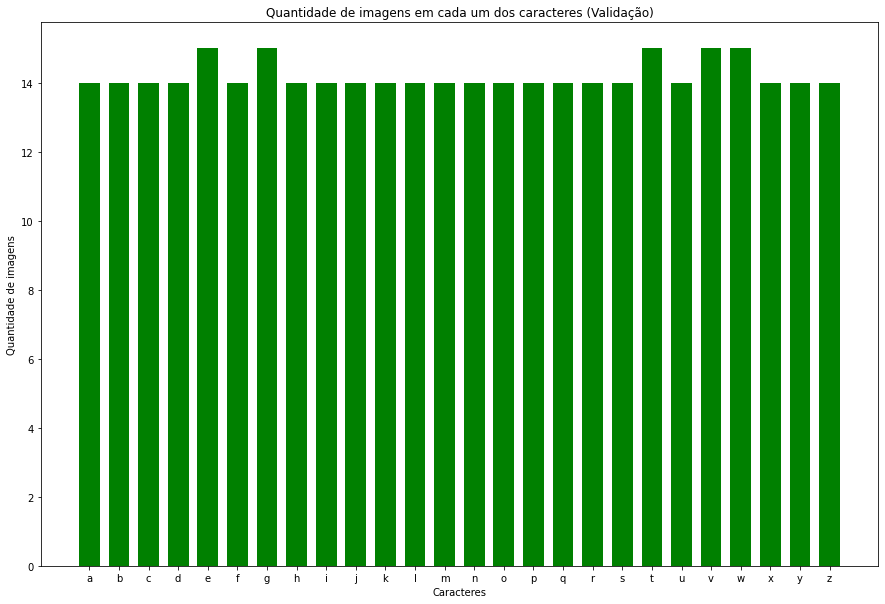

In [263]:
# gráfico de visualização da quantidade de imagens de validação
labels = validation_df['Labels']
labels = np.array(labels)
count = np.zeros((26,1))
for i in range(0, len(labels)):
    count[labels[i]-1] += 1

plt.figure(figsize=(15, 10))
plt.bar(xticks, np.squeeze(count), color ='green', width = 0.7)
plt.title('Quantidade de imagens em cada um dos caracteres (Validação)')
plt.xlabel('Caracteres')
plt.ylabel('Quantidade de imagens')


Text(0, 0.5, 'Quantidade de imagens')

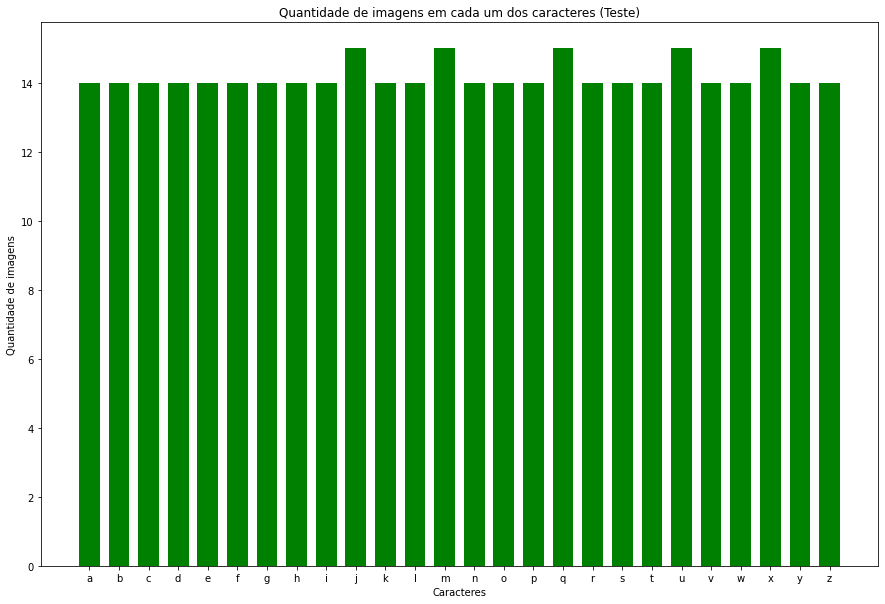

In [264]:
# gráfico de visualização da quantidade de imagens de teste
labels = test_df['Labels']
labels = np.array(labels)
count = np.zeros((26,1))
for i in range(0, len(labels)):
    count[labels[i]-1] += 1

plt.figure(figsize=(15, 10))
plt.bar(xticks, np.squeeze(count), color ='green', width = 0.7)
plt.title('Quantidade de imagens em cada um dos caracteres (Teste)')
plt.xlabel('Caracteres')
plt.ylabel('Quantidade de imagens')


## Organizando o Gerador de Imagens


In [192]:
def binarize(image):
    '''
    Garantindo que as imagens estaram binarizada no limite discreto [0,1]
    '''

    image = image / np.max(image)
    
    return image

In [276]:
# criando um array com os rótulos 
labels = []
for i in range(0, 26):
    labels.append(i+1)

In [279]:
# organizando o gerador de imagens para os dados de treinamento
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = binarize)
train_generator = train_gen.flow_from_dataframe(dataframe = train_df,
                                                directory='', 
                                                x_col = 'Path',
                                                y_col = labels,
                                                target_size = (33,24),
                                                color_mode = 'grayscale',
                                                class_mode = 'raw',
                                                batch_size = 128, 
                                                shuffle = True, seed = 42,
                                                interpolation = 'constant')

Found 2952 validated image filenames.


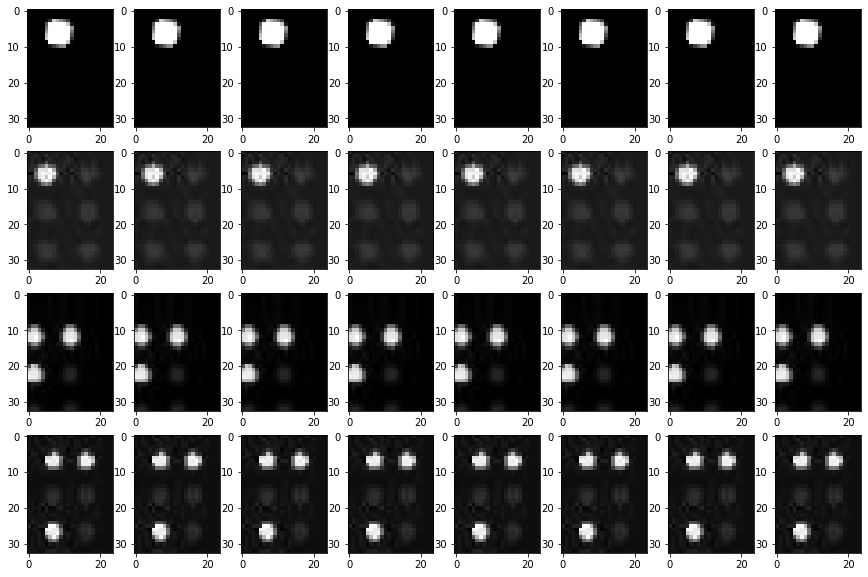

In [288]:
# visualizando as imagens de treinamento
x, y = train_generator[0]
fig, axs = plt.subplots(nrows = 4, ncols = 8, figsize = (15, 10))

for i in range (0, 4):
    for j in range(0, 8):
        axs[i][j].imshow(x[i], vmin = np.min(x[i]), vmax = np.max(x[i]), cmap = 'gray')

In [289]:
# organizando o gerador de imagens para os dados de validação
validation_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = binarize)
validation_generator = validation_gen.flow_from_dataframe(dataframe = validation_df,
                                                          directory='', 
                                                          x_col = 'Path',
                                                          y_col = labels,
                                                          target_size = (33,24),
                                                          color_mode = 'grayscale',
                                                          class_mode = 'raw',
                                                          batch_size = 128, 
                                                          shuffle = True, seed = 42,
                                                          interpolation = 'constant')

Found 369 validated image filenames.


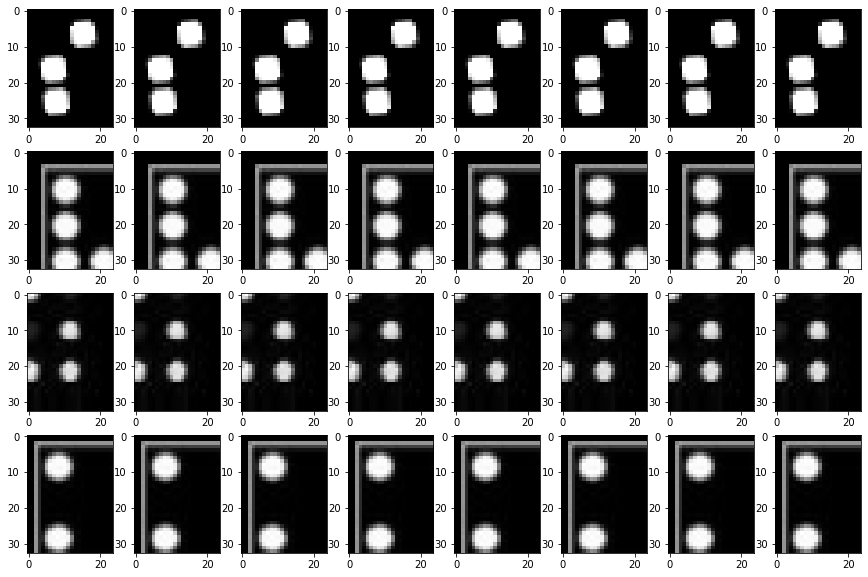

In [290]:
# visualizando as imagens de validação
x, y = validation_generator[0]
fig, axs = plt.subplots(nrows = 4, ncols = 8, figsize = (15, 10))

for i in range (0, 4):
    for j in range(0, 8):
        axs[i][j].imshow(x[i], vmin = np.min(x[i]), vmax = np.max(x[i]), cmap = 'gray')

In [291]:
# organizando o gerador de imagens para os dados de teste
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = binarize)
test_generator = test_gen.flow_from_dataframe(dataframe = test_df,
                                               directory='', 
                                               x_col = 'Path',
                                               y_col = labels,
                                               target_size = (33,24),
                                               color_mode = 'grayscale',
                                               class_mode = 'raw',
                                               batch_size = 128, 
                                               shuffle = True, seed = 42,
                                               interpolation = 'constant')

Found 369 validated image filenames.


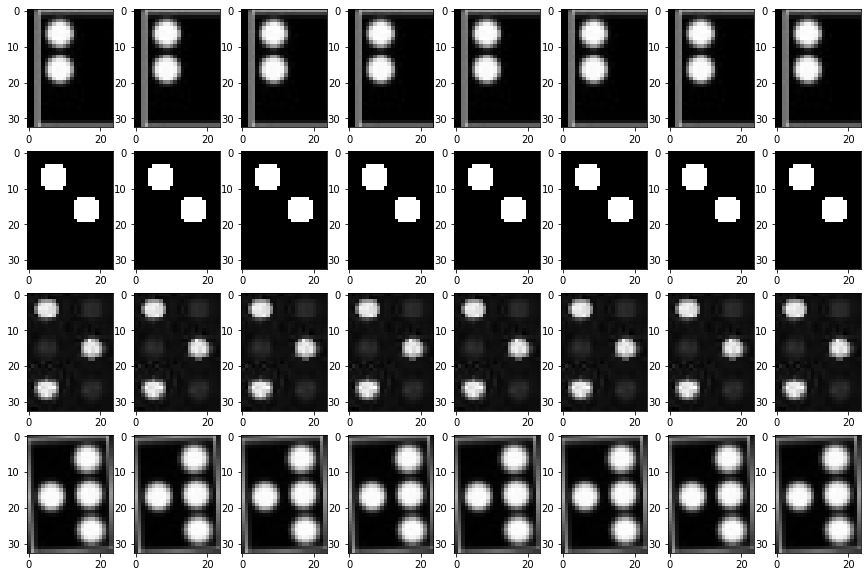

In [292]:
# visualizando as imagens de teste
x, y = test_generator[0]
fig, axs = plt.subplots(nrows = 4, ncols = 8, figsize = (15, 10))

for i in range (0, 4):
    for j in range(0, 8):
        axs[i][j].imshow(x[i], vmin = np.min(x[i]), vmax = np.max(x[i]), cmap = 'gray')

## Organizando a Arquitetura da Rede

In [227]:
# definindo a arquitetura da rede neural convolucional
input = tf.keras.layers.Input(shape = (33, 24, 1))
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (2,2), strides = (1,1), 
                           activation = tf.nn.relu, name = 'Conv2D-1')(input)
x = tf.keras.layers.MaxPooling2D(pool_size = (2,2), name = 'Pooling-1')(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (2,2), strides = (1, 1),
                           activation = tf.nn.relu, name = 'Conv2D-2')(x)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), name = 'Pooling-2')(x)
x = tf.keras.layers.Flatten(name = 'Flatten-1')(x)
x = tf.keras.layers.Dense(units = 128, activation = tf.nn.relu, name = 'Dense-1')(x)
x = tf.keras.layers.Dense(units = 64, activation = tf.nn.relu, name = 'Dense-2')(x)
output = tf.keras.layers.Dense(units = 26, activation  = tf.nn.softmax)(x)

model = tf.keras.models.Model(inputs = input, outputs = output)

In [228]:
# visualizando um resumo da arquitetura de rede definida
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 33, 24, 1)]       0         
_________________________________________________________________
Conv2D-1 (Conv2D)            (None, 32, 23, 32)        160       
_________________________________________________________________
Pooling-1 (MaxPooling2D)     (None, 16, 11, 32)        0         
_________________________________________________________________
Conv2D-2 (Conv2D)            (None, 15, 10, 64)        8256      
_________________________________________________________________
Pooling-2 (MaxPooling2D)     (None, 7, 5, 64)          0         
_________________________________________________________________
Flatten-1 (Flatten)          (None, 2240)              0         
_________________________________________________________________
Dense-1 (Dense)              (None, 128)              

In [294]:
# compilação do modelo
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

## Definição dos Callbacks

In [233]:
# salvando os melhores pesos obtidos no treinamento com base nos dados de validação
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = 'weights.h5', monitor = 'val_acc',
                                                verbose = 1, save_best_only = True, save_weights_only = True, 
                                                mode = 'max')

In [232]:
# armazenando o histórico de treinamento em um arquivo .csv
csv_logger = tf.keras.callbacks.CSVLogger(filename = 'history.csv', separator = ",", 
                                          append=False)

## Treinamento da Rede Neural Convolucional

In [240]:
# épocas utilizadas durante o treinamento
epochs = 15
# passos por época nos dados de treinamento
stes_per_epochs = len(train_df) // 128
# passos por época nos dados de validação
validation_steps_per_epoch = (len(validation_df) // 128) + 1
# criando um array de callbacks
callbacks = [checkpoint, csv_logger]

In [295]:
# treinando o modelo com os dados de treinamento e validação
model.fit(train_generator, steps_per_epoch = stes_per_epochs, epochs = epochs, 
          verbose = 1, callbacks = callbacks, validation_data = validation_generator, 
          validation_steps = validation_steps_per_epoch, )

Epoch 1/15
23/23 [==============================] - ETA: 0s - loss: 2.4434 - acc: 0.3477
Epoch 00001: val_acc improved from -inf to 0.62331, saving model to weights.h5
23/23 [==============================] - 5s 202ms/step - loss: 2.4434 - acc: 0.3477 - val_loss: 1.4112 - val_acc: 0.6233
Epoch 2/15
23/23 [==============================] - ETA: 0s - loss: 0.9152 - acc: 0.7638
Epoch 00002: val_acc improved from 0.62331 to 0.83740, saving model to weights.h5
23/23 [==============================] - 4s 192ms/step - loss: 0.9152 - acc: 0.7638 - val_loss: 0.6219 - val_acc: 0.8374
Epoch 3/15
23/23 [==============================] - ETA: 0s - loss: 0.5277 - acc: 0.8640
Epoch 00003: val_acc improved from 0.83740 to 0.86992, saving model to weights.h5
23/23 [==============================] - 4s 167ms/step - loss: 0.5277 - acc: 0.8640 - val_loss: 0.4621 - val_acc: 0.8699
Epoch 4/15
23/23 [==============================] - ETA: 0s - loss: 0.4266 - acc: 0.8831
Epoch 00004: val_acc improved from 0.8

## Avaliando o Desempenho da Rede com os dados de teste

In [347]:
# carregando no modelo o melhor peso obtido durante o treinamento
model.load_weights('weights.h5')

In [348]:
# analisando o desempenho da rede com os dados de teste
evaluate = model.evaluate(test_generator)

print('Acurácia com os Dados de Teste:', evaluate[1] * 100)
print('Função de Perda com os Dados de Teste:', evaluate[0] * 100)

3/3 [==============================] - 0s 107ms/step - loss: 0.1971 - acc: 0.9431
Acurácia com os Dados de Teste: 94.30894255638123
Função de Perda com os Dados de Teste: 19.708849489688873


In [349]:
# obtendo os dados do gerador de imagens
x1, y1 = test_generator[0]
x2, y2 = test_generator[1]
x3, y3 = test_generator[2]

# concatenando os dados obtidos do gerados
x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))

In [350]:
# realizando a predição com os dados de teste
predict_y = model.predict(x)

Text(0.5, 1.0, 'Matriz de Confusão')

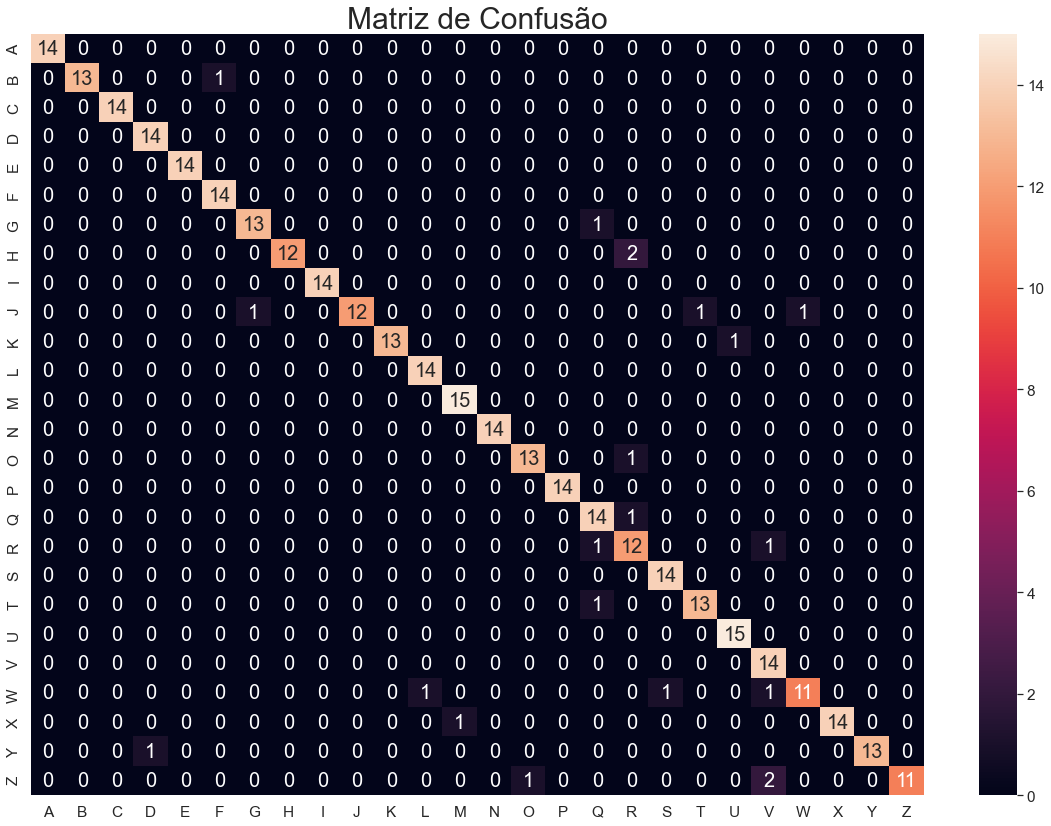

In [367]:
# plotando a matriz de confusão
confusion_ma = confusion_matrix(np.argmax(y, axis = 1), np.argmax(predict_y, axis=1))
df_cm = pd.DataFrame(confusion_ma, index = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"],
                     columns = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"])
plt.figure(figsize = (20,14))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20})
plt.title('Matriz de Confusão', size = 30)

In [355]:
# carregando os dados obtidos durante a etapa de treinamento
history = pd.read_csv('history.csv', delimiter = ',')

Text(0.5, 0, 'Épocas')

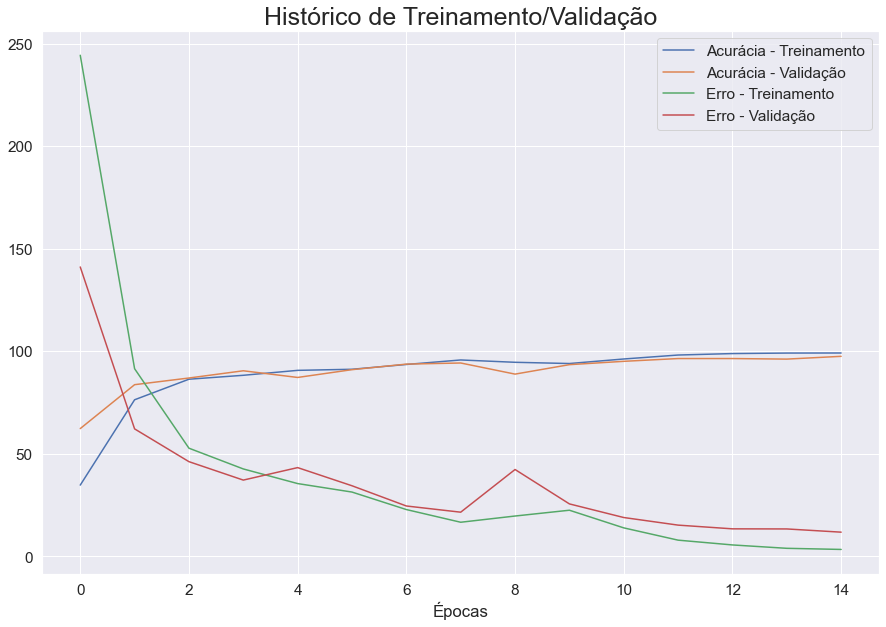

In [365]:
# plotando as informações obtidas durante o treinamento
plt.figure(figsize = (15, 10))
plt.plot(np.arange(0, epochs), history['acc'] * 100, label = 'Acurácia - Treinamento')
plt.plot(np.arange(0, epochs), history['val_acc'] * 100, label = 'Acurácia - Validação')
plt.plot(np.arange(0, epochs), history['loss'] * 100, label = 'Erro - Treinamento')
plt.plot(np.arange(0, epochs), history['val_loss'] * 100, label = 'Erro - Validação')
plt.legend()
plt.title('Histórico de Treinamento/Validação', size = 25)
plt.xlabel('Épocas')

## Salvando as informações obtidas

In [352]:
# salvando os dados para plotar uma melhor matriz de confusão
np.savetxt('confusion_ma.txt', confusion_ma)
np.savetxt('y_true.txt', np.argmax(y, axis = 1))
np.savetxt('y_predict.txt', np.argmax(predict_y, axis=1))

In [ ]:
# salvando o modelo obtido
model.save('obr-classifier')